In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import datetime as datetime

In [81]:
df = pd.read_csv("/content/airline_passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [82]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [83]:
df.dropna(axis=0, inplace = True)

In [84]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [86]:
df["Month"] = pd.to_datetime(df["Month"])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [88]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [89]:
df.set_index("Month", drop = True, inplace = True)

In [90]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

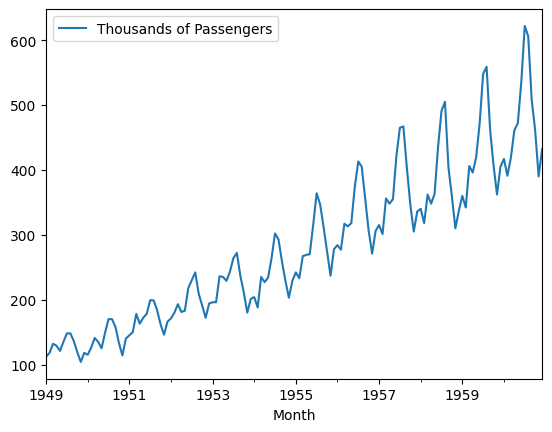

In [91]:
df.plot()

In [92]:
from statsmodels.tsa.stattools import adfuller

In [93]:
def adf_test(series):
  result = adfuller(series)
  print("ADF Stats: {}".format(result[0]))
  print("p - value: {}".format(result[1]))

  if result[1] <= 0.05:
    print("Rejected: Null Hypothesis")
  else:
    print("Accepted: Null Hypothesis")

In [94]:
adf_test(df["Thousands of Passengers"])

ADF Stats: 0.8153688792060498
p - value: 0.991880243437641
Accepted: Null Hypothesis


In [95]:
df["Passangers First Difference"] = df["Thousands of Passengers"] - df["Thousands of Passengers"].shift(1)

In [96]:
df.head()

,Thousands of Passengers,Passangers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [97]:
adf_test(df["Passangers First Difference"].dropna())

ADF Stats: -2.8292668241700047
p - value: 0.05421329028382478
Accepted: Null Hypothesis


In [98]:
df["Passangers Second Difference"] = df["Passangers First Difference"] - df["Passangers First Difference"].shift(1)

In [99]:
adf_test(df["Passangers Second Difference"].dropna())

ADF Stats: -16.384231542468513
p - value: 2.7328918500142026e-29
Rejected: Null Hypothesis


In [100]:
df["Passangers 12 Difference"] = df["Thousands of Passengers"] - df["Thousands of Passengers"].shift(12)

In [101]:
adf_test(df["Passangers 12 Difference"].dropna())

ADF Stats: -3.383020726492481
p - value: 0.011551493085514952
Rejected: Null Hypothesis


In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

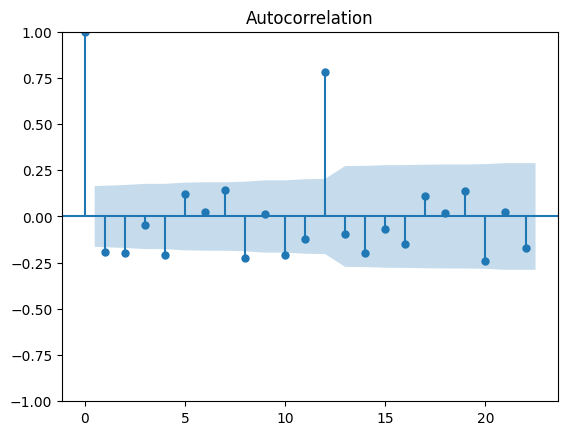

In [103]:
acf = plot_acf(df["Passangers Second Difference"].dropna())

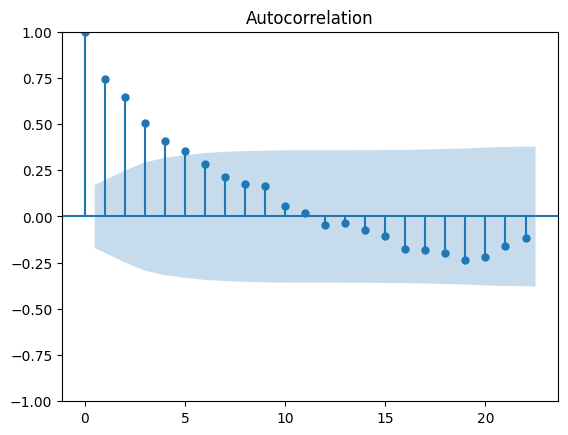

In [104]:
acf12 = plot_acf(df["Passangers 12 Difference"].dropna())

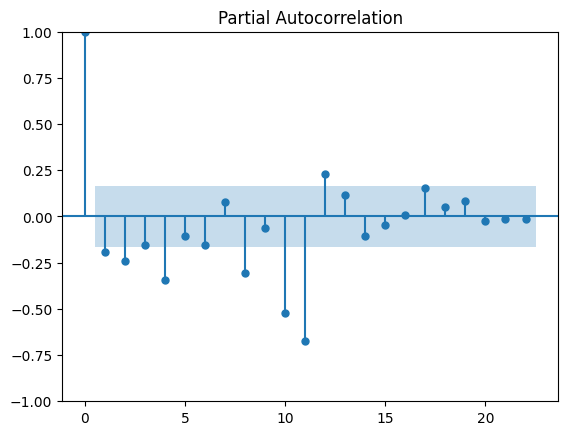

In [105]:
pacf = plot_pacf(df["Passangers Second Difference"].dropna())

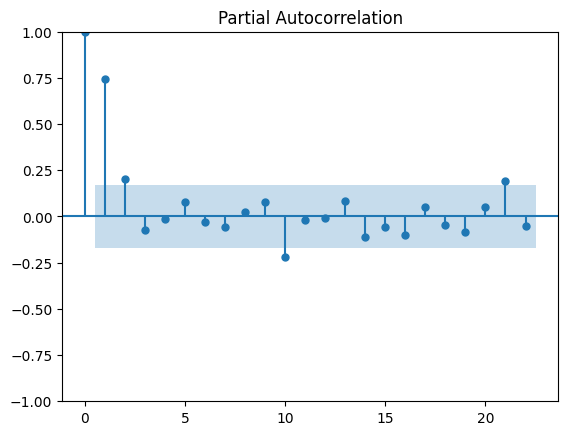

In [106]:
pacf12 = plot_pacf(df["Passangers 12 Difference"].dropna())

In [107]:
df

,Thousands of Passengers,Passangers First Difference,Passangers Second Difference,Passangers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [108]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [109]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end + timedelta(days = 1): test_dataset_end]

In [110]:
# Prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [111]:
test_data

,Thousands of Passengers,Passangers First Difference,Passangers Second Difference,Passangers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [112]:
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA = ARIMA(train_data["Thousands of Passengers"],order = (10, 2, 0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [113]:
model_ARIMA_Fit = model_ARIMA.fit()

In [114]:
model_ARIMA_Fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Fri, 26 Jan 2024   AIC                            736.477
Time:                             09:34:24   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [116]:
pred = model_ARIMA_Fit.predict(start = pred_start_date, end=pred_end_date)
residual = test_data["Thousands of Passengers"] - pred

In [117]:
residual

Month
1956-01-01    -16.183612
1956-02-01    -32.478355
1956-03-01      0.556985
1956-04-01      5.172456
1956-05-01     -0.544234
1956-06-01     25.077917
1956-07-01     46.979713
1956-08-01     58.432466
1956-09-01     22.879031
1956-10-01     -1.734755
1956-11-01    -40.623912
1956-12-01    -33.828197
1957-01-01    -34.840405
1957-02-01    -55.098234
1957-03-01      5.312171
1957-04-01     -2.080465
1957-05-01     -6.157694
1957-06-01     40.783483
1957-07-01     82.680626
1957-08-01     94.147419
1957-09-01     39.889902
1957-10-01     -9.108926
1957-11-01    -66.293791
1957-12-01    -49.323597
1958-01-01    -52.077839
1958-02-01    -73.405852
1958-03-01    -26.404583
1958-04-01    -43.572859
1958-05-01    -39.448082
1958-06-01     21.744314
1958-07-01     80.146583
1958-08-01     97.329454
1958-09-01      1.513662
1958-10-01    -47.089150
1958-11-01   -108.125316
1958-12-01    -89.012377
1959-01-01    -69.205584
1959-02-01    -85.352235
1959-03-01    -22.150992
1959-04-01    -36.7

<Axes: ylabel='Density'>

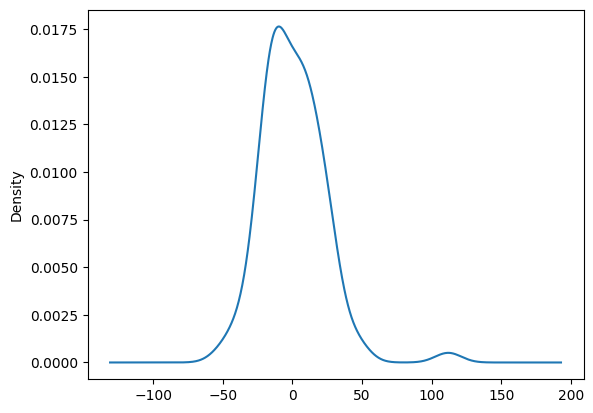

In [118]:
model_ARIMA_Fit.resid.plot(kind = "kde")

In [119]:
test_data["Predicted ARIMA"] = pred

<ipython-input-119-0b225047593e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted ARIMA"] = pred


In [120]:
test_data

,Thousands of Passengers,Passangers First Difference,Passangers Second Difference,Passangers 12 Difference,Predicted ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612
1956-02-01,277.0,-7.0,-13.0,44.0,309.478355
1956-03-01,317.0,40.0,47.0,50.0,316.443015
1956-04-01,313.0,-4.0,-44.0,44.0,307.827544
1956-05-01,318.0,5.0,9.0,48.0,318.544234
1956-06-01,374.0,56.0,51.0,59.0,348.922083
1956-07-01,413.0,39.0,-17.0,49.0,366.020287
1956-08-01,405.0,-8.0,-47.0,58.0,346.567534
1956-09-01,355.0,-50.0,-42.0,43.0,332.120969


<Axes: xlabel='Month'>

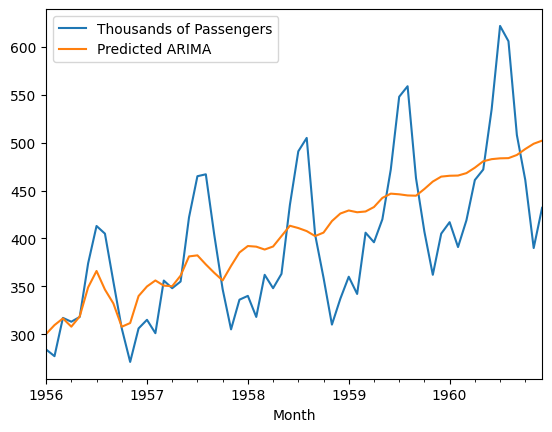

In [121]:
test_data[["Thousands of Passengers", "Predicted ARIMA"]].plot()

In [122]:
test_data

,Thousands of Passengers,Passangers First Difference,Passangers Second Difference,Passangers 12 Difference,Predicted ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612
1956-02-01,277.0,-7.0,-13.0,44.0,309.478355
1956-03-01,317.0,40.0,47.0,50.0,316.443015
1956-04-01,313.0,-4.0,-44.0,44.0,307.827544
1956-05-01,318.0,5.0,9.0,48.0,318.544234
1956-06-01,374.0,56.0,51.0,59.0,348.922083
1956-07-01,413.0,39.0,-17.0,49.0,366.020287
1956-08-01,405.0,-8.0,-47.0,58.0,346.567534
1956-09-01,355.0,-50.0,-42.0,43.0,332.120969


In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [143]:
model_SARIMAX=SARIMAX(train_data["Thousands of Passengers"], order=(3,0,5), seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [144]:
model_SARIMAX_fit = model_SARIMAX.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [145]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 26 Jan 2024   AIC                            548.481
Time:                                     09:38:18   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
pred_sarima = model_SARIMAX_fit.predict(start = datetime(1956,1,1), end = datetime(1960,12,1))
residuals = test_data["Thousands of Passengers"] - pred_sarima

In [147]:
residuals

Month
1956-01-01     -2.184182
1956-02-01     -4.276997
1956-03-01      7.084187
1956-04-01      2.323988
1956-05-01      6.665373
1956-06-01     19.050816
1956-07-01      9.602438
1956-08-01     19.929415
1956-09-01      5.554919
1956-10-01     -4.217597
1956-11-01     -1.563754
1956-12-01     -6.435427
1957-01-01     -4.956519
1957-02-01    -13.010704
1957-03-01     14.012454
1957-04-01      6.211487
1957-05-01     13.207001
1957-06-01     37.481500
1957-07-01     32.674668
1957-08-01     53.828400
1957-09-01     27.079471
1957-10-01     10.078064
1957-11-01      6.339090
1957-12-01     -1.811489
1958-01-01     -4.745424
1958-02-01    -20.123747
1958-03-01     -3.534506
1958-04-01    -16.700749
1958-05-01     -1.160817
1958-06-01     28.710791
1958-07-01     37.426482
1958-08-01     71.142762
1958-09-01      6.894501
1958-10-01      2.423750
1958-11-01     -7.836164
1958-12-01    -19.485630
1959-01-01     -2.961710
1959-02-01    -13.866383
1959-03-01     23.160027
1959-04-01     14.4

<Axes: ylabel='Density'>

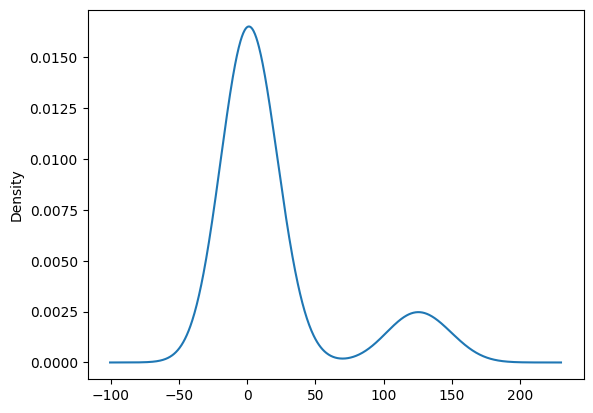

In [148]:
model_SARIMAX_fit.resid.plot(kind = "kde")

In [149]:
test_data["Predicted_SARIMA"] = pred_sarima

<ipython-input-149-524a13c43cb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_SARIMA"] = pred_sarima


In [150]:
test_data

,Thousands of Passengers,Passangers First Difference,Passangers Second Difference,Passangers 12 Difference,Predicted ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,286.184182
1956-02-01,277.0,-7.0,-13.0,44.0,309.478355,281.276997
1956-03-01,317.0,40.0,47.0,50.0,316.443015,309.915813
1956-04-01,313.0,-4.0,-44.0,44.0,307.827544,310.676012
1956-05-01,318.0,5.0,9.0,48.0,318.544234,311.334627
1956-06-01,374.0,56.0,51.0,59.0,348.922083,354.949184
1956-07-01,413.0,39.0,-17.0,49.0,366.020287,403.397562
1956-08-01,405.0,-8.0,-47.0,58.0,346.567534,385.070585
1956-09-01,355.0,-50.0,-42.0,43.0,332.120969,349.445081


<Axes: xlabel='Month'>

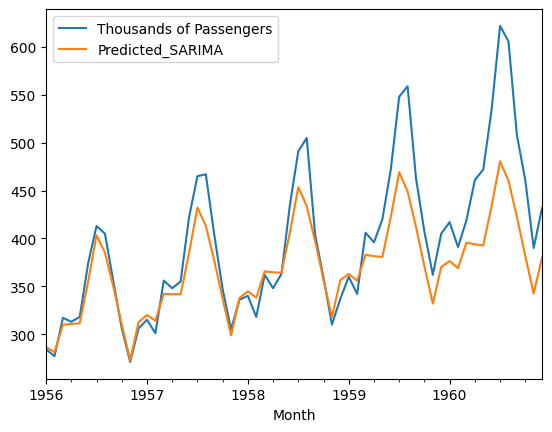

In [151]:
test_data[["Thousands of Passengers", "Predicted_SARIMA"]].plot()